# Portfolio Optimisation

In [1]:
#LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
from pandas_datareader import data as web
from nsepy import get_history

In [2]:
#Portfolio of Stocks
pf=["RELIANCE", "SBIN", "TATAMOTORS", "INFY"]

In [3]:
#Weight of Each stock in the portfolio
wt=np.array([0.3,0.2,0.25,0.25])

In [4]:
#Start Date for analysis
startdt=date(2019,1,1)

#End Date
enddt= date(2021,6,30)

In [5]:
#Closing Price
closep=pd.DataFrame()

In [6]:
for stock in pf:
    closep[stock] = get_history(stock, startdt, enddt)['Close']

In [7]:
closep['INFY'].count()

619

In [8]:
closep

,RELIANCE,SBIN,TATAMOTORS,INFY
Date,,,,
2019-01-01,1121.00,299.60,173.45,665.05
2019-01-02,1106.40,293.90,168.55,669.05
2019-01-03,1092.75,291.10,166.05,669.15
2019-01-04,1098.65,297.65,170.95,661.05
2019-01-07,1104.75,296.30,175.35,671.70
...,...,...,...,...
2021-06-24,2153.50,417.20,334.65,1559.20
2021-06-25,2104.45,428.80,339.65,1574.20
2021-06-28,2086.00,426.75,342.80,1571.80


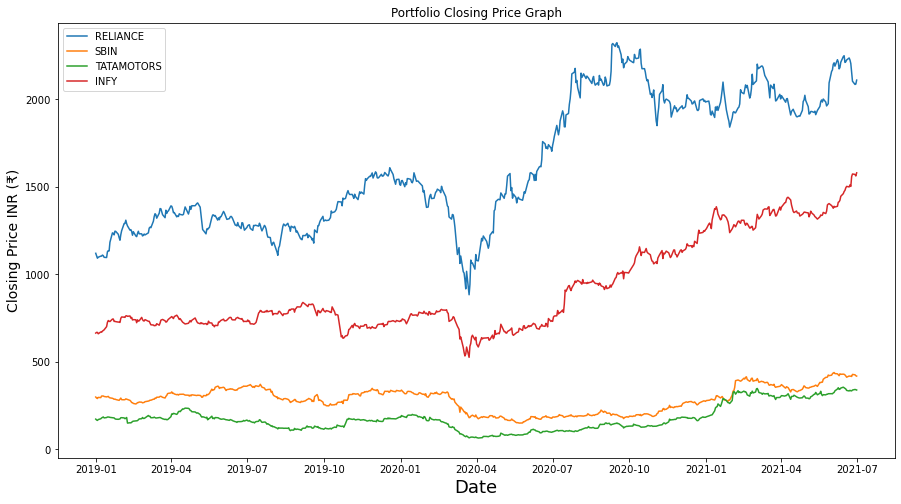

In [9]:
#Graph of all the stocks
title = 'Portfolio Closing Price Graph'

plt.figure(figsize=(15,8)) #width = 12.2in, height = 4.5

for i in closep.columns.values:
    plt.plot(closep[i],  label=i)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price INR (₹)',fontsize=14)
plt.legend(closep.columns.values, loc='upper left')
plt.show()

In [10]:
#Creating a Dataframe with the log returns data of the Stocks
log_ret=np.log(closep/closep.shift(1))
log_ret=log_ret.dropna()
log_ret

,RELIANCE,SBIN,TATAMOTORS,INFY
Date,,,,
2019-01-02,-0.013110,-0.019209,-0.028657,0.005997
2019-01-03,-0.012414,-0.009573,-0.014943,0.000149
2019-01-04,0.005385,0.022251,0.029082,-0.012179
2019-01-07,0.005537,-0.004546,0.025413,0.015982
2019-01-08,-0.000091,0.029922,0.025895,-0.002459
...,...,...,...,...
2021-06-24,-0.023792,-0.003947,-0.001791,0.036610
2021-06-25,-0.023040,0.027425,0.014830,0.009574
2021-06-28,-0.008806,-0.004792,0.009232,-0.001526


In [11]:
ret=closep.pct_change()
ret=ret.dropna()
ret

,RELIANCE,SBIN,TATAMOTORS,INFY
Date,,,,
2019-01-02,-0.013024,-0.019025,-0.028250,0.006015
2019-01-03,-0.012337,-0.009527,-0.014832,0.000149
2019-01-04,0.005399,0.022501,0.029509,-0.012105
2019-01-07,0.005552,-0.004536,0.025739,0.016111
2019-01-08,-0.000091,0.030375,0.026233,-0.002456
...,...,...,...,...
2021-06-24,-0.023511,-0.003939,-0.001790,0.037288
2021-06-25,-0.022777,0.027804,0.014941,0.009620
2021-06-28,-0.008767,-0.004781,0.009274,-0.001525


In [12]:
#Covariance Matrix
cov_mat = ret.cov() * 252
cov_mat

,RELIANCE,SBIN,TATAMOTORS,INFY
RELIANCE,0.132215,0.057492,0.076161,0.037603
SBIN,0.057492,0.171288,0.118779,0.035093
TATAMOTORS,0.076161,0.118779,0.332432,0.053002
INFY,0.037603,0.035093,0.053002,0.104958


In [13]:
#Portfolio Variance
pf_var = np.dot(wt.T, np.dot(cov_mat, wt))
print("The Variance for Portfolio is : {:.2f}% ".format(pf_var*100))

The Variance for Portfolio is : 9.21% 


In [14]:
#Expected Volatility
pf_vol= np.sqrt(pf_var)
print("The Portfolio volitility/S.D./risk is : {:.2f}% ".format(pf_vol*100))

The Portfolio volitility/S.D./risk is : 30.34% 


In [15]:
#Annual Return
pf_Ret = np.sum(ret.mean()*wt) * 252
print("The Annual Return for the portfolio consisting of {} with weights {} is {:.2f}%".format(pf,wt,pf_Ret*100))

The Annual Return for the portfolio consisting of ['RELIANCE', 'SBIN', 'TATAMOTORS', 'INFY'] with weights [0.3  0.2  0.25 0.25] is 35.28%


# SHARPE RATIO PLOT AND RESPECTIVE WEIGHT

In [16]:
num_ports = 3000
all_weights = np.zeros((num_ports, len(pf)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [17]:
print("Max Sharpe Ratio is {}".format(sharpe_arr.max()))
print("The location is {}".format(sharpe_arr.argmax()))
print("The weights for {} is {}%".format(pf,all_weights[sharpe_arr.argmax(),:]*100))

Max Sharpe Ratio is 1.1492863512756117
The location is 69
The weights for ['RELIANCE', 'SBIN', 'TATAMOTORS', 'INFY'] is [27.01946071  0.15662825  0.92455745 71.89935359]%


In [18]:
print(vol_arr[vol_arr.argmin()])

0.26723044752930175


In [19]:
max_sr_ret=ret_arr[sharpe_arr.argmax()]
max_sr_vol=vol_arr[sharpe_arr.argmax()]
min_vol=vol_arr[vol_arr.argmin()]

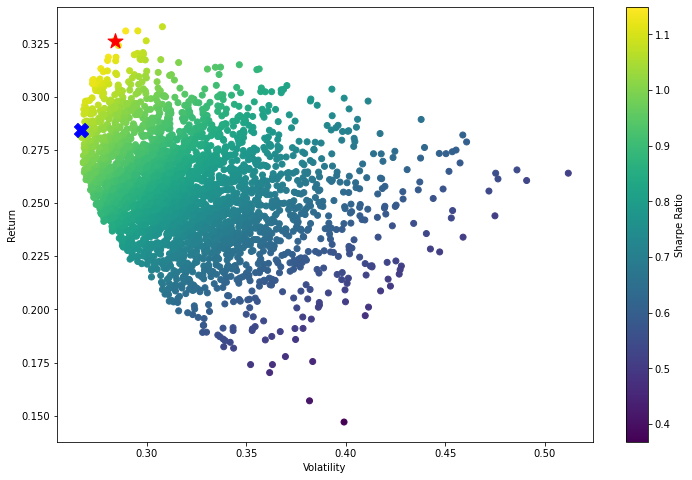

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', marker="*", s=250) # red dot
plt.scatter(min_vol, ret_arr[vol_arr.argmin()], c='blue', marker="X", s=200) #blue X
plt.show()

The red dot shows the Best Sharpe Ratio portfolio allocation while the Blue dot shows the least risky point of allocation.

In [21]:
print("The weightage for the least risky portfolio of stocks will be {} is {}%".format(pf,all_weights[vol_arr.argmin(),:]*100))

The weightage for the least risky portfolio of stocks will be ['RELIANCE', 'SBIN', 'TATAMOTORS', 'INFY'] is [34.38364068 16.42983213  0.86200074 48.32452645]%
